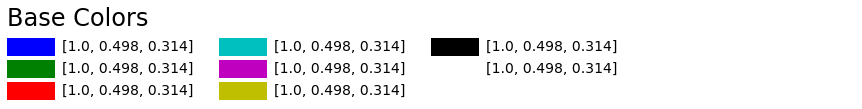

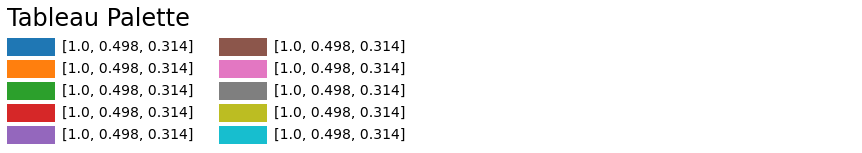

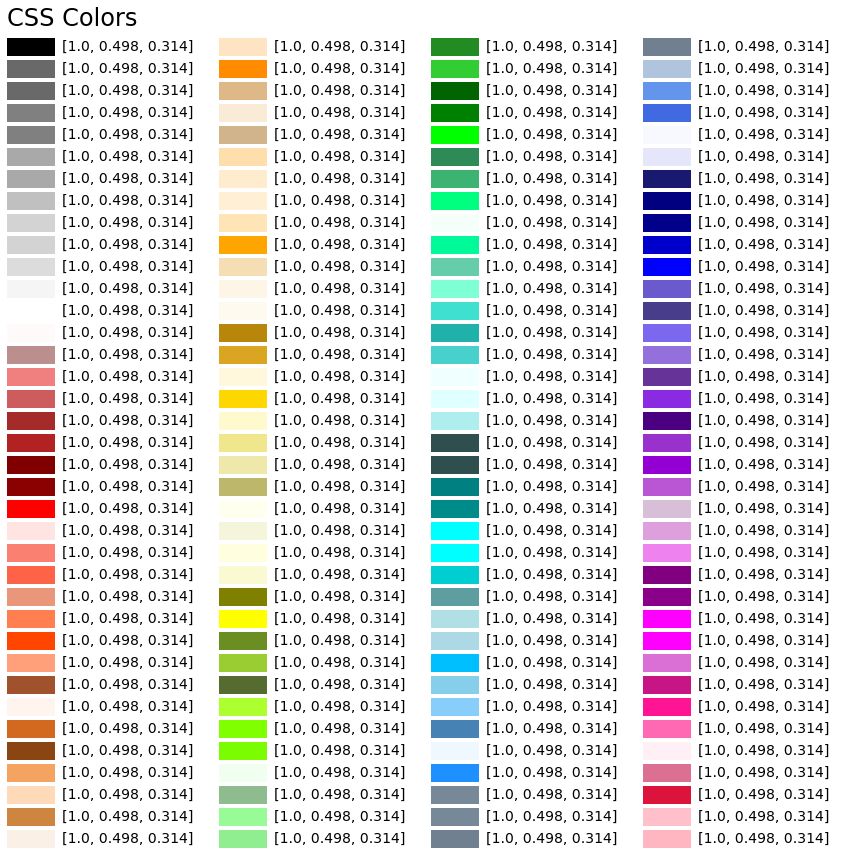

In [20]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 


# helper function to plot a color table 
def colortable(colors, title, colors_sort = True, emptycols = 0): 

	# cell dimensions 
	width = 212
	height = 22
	swatch_width = 48
	margin = 12
	topmargin = 40

	# Sorting colors bbased on hue, saturation, 
	# value and name. 
	if colors_sort is True: 
		to_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), 
						name) 
						for name, color in colors.items()) 				
		names = [name for hsv, name in to_hsv] 
		
	else: 
		names = list(colors) 

	length_of_names = len(names) 
	length_cols = 4 - emptycols 
	length_rows = length_of_names // length_cols + int(length_of_names % length_cols > 0) 

	width2 = width * 4 + 2 * margin 
	height2 = height * length_rows + margin + topmargin 
	dpi = 72

	figure, axes = plt.subplots(figsize =(width2 / dpi, height2 / dpi), dpi = dpi) 
	figure.subplots_adjust(margin / width2, margin / height2, 
						(width2-margin)/width2, (height2-topmargin)/height2) 
	
	axes.set_xlim(0, width * 4) 
	axes.set_ylim(height * (length_rows-0.5), -height / 2.) 
	axes.yaxis.set_visible(False) 
	axes.xaxis.set_visible(False) 
	axes.set_axis_off() 
	axes.set_title(title, fontsize = 24, loc ="left", pad = 10) 

	for i, name in enumerate(names): 
		
		rows = i % length_rows 
		cols = i // length_rows 
		y = rows * height 

		swatch_start_x = width * cols 
		swatch_end_x = width * cols + swatch_width 
		text_pos_x = width * cols + swatch_width + 7

		#show = name
		show = [round (el,3) for el in list(mcolors.to_rgb('coral'))]

		axes.text(text_pos_x, y,show , fontsize = 14, 
				horizontalalignment ='left', 
				verticalalignment ='center') 

		axes.hlines(y, swatch_start_x, swatch_end_x, 
				color = colors[name], linewidth = 18) 

	return figure 

colortable(mcolors.BASE_COLORS, "Base Colors", 
				colors_sort = False, emptycols = 1) 
colortable(mcolors.TABLEAU_COLORS, "Tableau Palette", 
				colors_sort = False, emptycols = 2) 
colortable(mcolors.CSS4_COLORS, "CSS Colors") 

plt.show() 
